# Substitution Ciphers

Substitution cipher is a method of encryption that generates a ciphertext starting from a plaintext whose letters are scrambled in various ways. If the substitution cipher operates on single letters then it's defined as a simple substitution cipher, whereas if it operates on large groups of letters it's defined polygraphic. 

In [1]:
# import modules here
import os
import numpy as np
import string
import pickle
import matplotlib.pyplot as plt

SHIFT_EXERCISE = 14
ALPHABET = tuple(string.ascii_lowercase)

## Caesar Cipher

Caesar cipher is a monoalphabetic substitution cipher since it works on single characters. Moreover, unlike the substitution cipher, where letters are randomly scrambled, here letters are substituted according to a defined shift.
 For instance, if a shift equal to 1 is considered: the letter A is mapped with the letter B, B is mapped with C and so on.

There are two main attacks to break the Caesar cipher: 
- **Brute force** is an attack where all the possible shifts are tested against the ciphertext. Since the alphabet is composed of 26 letters, there are only 26 possibilities which makes this kind of attack feasible in this case.
- **Frequency analysis** is an attack where the distribution of the letters is inferred: the shift is computed by analyzing the distribution of the ciphertext and comparing it with the distribution of the english text taken as reference.

### Decoder

The decoding function (caesar_decoding) takes as inputs the ciphertext we wish to decrypt and the shift. Since we are using a bruteforce attack, a rule is generated for every shift and it has been implemented with a dictionary whose keys are the letters of the plain alphabet and the values are the letters of the alphabet shifted according to the shift taken into account.
The decryption of the ciphertext is performed by indexing the rule with each letter of the ciphertext and replacing them with the shifted one. However, special characters and numbers have been disregarded and this is done by considering only the lower case letters whose unicode is comprised between 97 and 127. 

In [2]:
def caesar_decoding(ciphertext, shift=0):
    # letters in unicode range from 97 to 127 , space -> 32, comma -> 44
    # NOTE: the shift is equal to 14
    alphabet = tuple(string.ascii_lowercase)
    ciphered_alphabet = alphabet[-shift:] + alphabet[:-shift]
    # print(ciphered_alphabet)
    rule = dict(zip(alphabet, ciphered_alphabet))
    # print(f'the rule is {rule}')
    plaintext = [rule[letter] if 97 <= ord(letter) <= 127 else letter for letter in ciphertext]
    return ''.join(plaintext)

In [3]:
# code snippet to test the implementation of the decoder
ciphertext = 'lipps!' # 'hello!' encoded with shift=4
plaintext = caesar_decoding(ciphertext, shift=4)

print(ciphertext, '->', plaintext)

lipps! -> hello!


### Ciphertext

In [4]:
# Load ciphertext
def read_cipher(file_name):
    try:
        with open(file=file_name, mode='r', encoding='utf-8') as file:
            cipher = file.read()
            return cipher
    except (IOError, OSError):
        return "It appears an error occurred while reading your file"

### Brute Force

In order to perform a brute force attack, we iterate the decoding function through all the 26 possibilities. This has been implemented considering a small sample of 27 letters (to reduce the needed computational power), then all the 26 different decrypted samples have been visually inspected in order to find the correct shift.

In [5]:
# Perform a Brute Force attack
file_path = os.path.join('ciphertext_caesar.txt')
ciphertext = read_cipher(file_path)

sample_cipher = ciphertext[:27]
for i in range(len(ALPHABET)):
    print(f"Iteration: {i}")
    print(caesar_decoding(sample_cipher, i))

Iteration: 0
qfmdhcufodvm, cf qfmdhczcum
Iteration: 1
pelcgbtencul, be pelcgbybtl
Iteration: 2
odkbfasdmbtk, ad odkbfaxask
Iteration: 3
ncjaezrclasj, zc ncjaezwzrj
Iteration: 4
mbizdyqbkzri, yb mbizdyvyqi
Iteration: 5
lahycxpajyqh, xa lahycxuxph
Iteration: 6
kzgxbwozixpg, wz kzgxbwtwog
Iteration: 7
jyfwavnyhwof, vy jyfwavsvnf
Iteration: 8
ixevzumxgvne, ux ixevzurume
Iteration: 9
hwduytlwfumd, tw hwduytqtld
Iteration: 10
gvctxskvetlc, sv gvctxspskc
Iteration: 11
fubswrjudskb, ru fubswrorjb
Iteration: 12
etarvqitcrja, qt etarvqnqia
Iteration: 13
dszquphsbqiz, ps dszqupmphz
Iteration: 14
cryptography, or cryptology
Iteration: 15
bqxosnfqzogx, nq bqxosnknfx
Iteration: 16
apwnrmepynfw, mp apwnrmjmew
Iteration: 17
zovmqldoxmev, lo zovmqlildv
Iteration: 18
ynulpkcnwldu, kn ynulpkhkcu
Iteration: 19
xmtkojbmvkct, jm xmtkojgjbt
Iteration: 20
wlsjnialujbs, il wlsjnifias
Iteration: 21
vkrimhzktiar, hk vkrimhehzr
Iteration: 22
ujqhlgyjshzq, gj ujqhlgdgyq
Iteration: 23
tipgkfxirgyp, fi tipgkfcfxp
It

Once the correct shift has been identified we use it to decode the whole ciphertext and save it into a .txt file. 

In [6]:
# It generates a text file with the decoded plaintext
def write_plaintext(plaintext, file_name):
    try:
        with open(file=os.path.join(file_name), mode='w', encoding='utf-8') as file:
            file.write(plaintext)
    except (IOError, OSError):
        return "It appears an error occurred while writing your file"


In [7]:
# Print decrypted plaintext and the key (shift)
print(f"\nShift is -> {SHIFT_EXERCISE}\n" )
complete_plaintext = caesar_decoding(ciphertext, SHIFT_EXERCISE)
print(complete_plaintext)
write_plaintext(complete_plaintext, "caesar_plaintext")


Shift is -> 14

cryptography, or cryptology (from ancient greek: κρυπτός, romanized: kryptós "hidden, secret"; and γράφειν graphein, "to write", or -λογία -logia, "study", respectively), is the practice and study of techniques for secure communication in the presence of third parties called adversaries. more generally, cryptography is about constructing and analyzing protocols that prevent third parties or the public from reading private messages; various aspects in information security such as data confidentiality, data integrity, authentication, and non-repudiation are central to modern cryptography. modern cryptography exists at the intersection of the disciplines of mathematics, computer science, electrical engineering, communication science, and physics. applications of cryptography include electronic commerce, chip-based payment cards, digital currencies, computer passwords, and military communications.
cryptography prior to the modern age was effectively synonymous with encrypt

## Simple Substitution Cipher

In a simple substitution cipher every letter of the plaintext is replaced with a random one. 

Since there is a random mapping between the plaintext letters and the ciphered ones, a brute force attack is no longer feasible due to its very demanding computational power since there are $26! \sim 10^{26}$ possible encoding rules. 
Hence, one way to perform the decryption is using the frequency analysis. 

### Decoder

In the decoding function the rule is indexed with each character of the ciphertext; those characters are then substituted with their corresponding letter that has been computed through the frequency analysis. 

In [8]:
def substitution_decoding(ciphertext, rule):
    plaintext = [rule[character] if 97 <= ord(character) <= 122 else character for character in ciphertext]
    return ''.join(plaintext)

In [9]:
# Test your function
test_rule = {"a":"h", "p":"e","w":"l","q":"o"}
print("apwwq ->", substitution_decoding("apwwq", test_rule))


apwwq -> hello


### Ciphertext

In [10]:
# Load ciphertext
ciphertext = read_cipher(os.path.join("ciphertext_simple.txt"))

### Frequency Analysis

In order to perform frequency analysis on the chipertext we need to compute the distribution of the letters of the reference text. The reason behind this is because letters are not uniformly distributed but rather certain characters have a higher probability than others to occur in a text. For instance, in english the letter "e" is the most common one and we can exploit this to decrypt a ciphertext encrypted with a simple substitution cipher. 

In [11]:
# Load the true letter frequency distribution computed in Homework
def read_pickle(file_name, bonus=False):
    with open(file=file_name, mode='rb') as file:
        eng_dist = pickle.load(file)

    if bonus:
        eng_dist = dict(sorted(eng_dist.items(), key=lambda x: x[1], reverse=True))
    return eng_dist

def letter_dist(ciphertext, bonus=False):
    freq = list(ciphertext.lower().count(letter) for letter in ALPHABET)
    prob = freq / np.sum(freq)
    ciph_dist = dict(zip(ALPHABET, prob))
    if bonus:
        ciph_dist = dict(sorted(ciph_dist.items(), key=lambda x: x[1], reverse=True))
    return ciph_dist



eng_dist = read_pickle(os.path.join("letters-freq.pkl"), True)
ciph_dist = letter_dist(ciphertext, True)

Two distribution graphs have been plotted showing the distribution of the letters (in an ascending order) corresponding to english reference text and the ciphertext. 

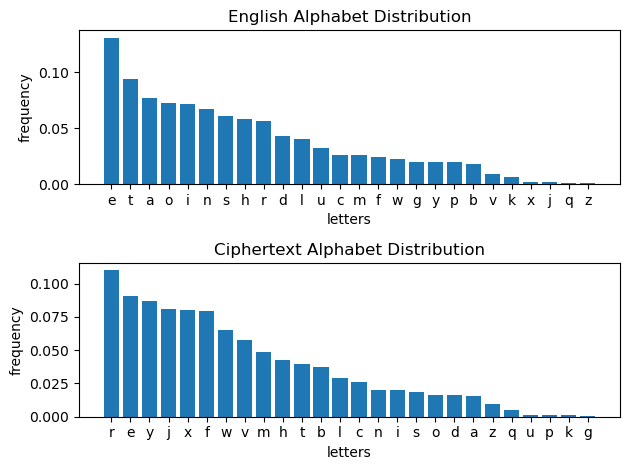

In [12]:
# Plot the distribution
def plot_me(funs_list):
    fig, ax = plt.subplots(len(funs_list), 1)
    for i, fun in enumerate(funs_list):
        ax[i].bar(fun[0].keys(), fun[0].values())
        ax[i].set(ylabel='frequency', xlabel='letters', title=fun[1])
    fig.tight_layout()
    plt.show()


plot_me([[eng_dist, "English Alphabet Distribution"], [ciph_dist, "Ciphertext Alphabet Distribution"]])


An initial guess for the rule is considering a rough direct mapping of the two distributions depicted above. 

In [13]:
# Perform the Frequency Analysis attack
rule = dict(zip(ciph_dist.keys(), eng_dist.keys()))
print(f"english_alphabet: {''.join(rule.values())}\n")
print(f"cipher_alphabet:  {''.join(rule.keys())}\n")

cip_sample = ciphertext[:1000]
plaintext = substitution_decoding(cip_sample, rule)
print(plaintext)

english_alphabet: etaoinshrdlucmfwgypbvkxjqz

cipher_alphabet:  reyjxfwvmhtblcnisodazqupkg

ldamue edpnnu srattnt (afhid 30, 1916 – webhmahy 24, 2001) pas at acehilat caorecaoiliat, edelohilad etgiteeh, atu lhyfonghafreh ktnpt as "ore waoreh nw itwnhcaoint orenhy". srattnt is tnoeu wnh ravitg wnmtueu itwnhcaoint orenhy pior a datucahk fafeh, "a caorecaoilad orenhy nw lnccmtilaoint", prilr re fmbdisreu it 1948.
re is adsn pedd ktnpt wnh wnmtuitg uigioad lihlmio uesigt orenhy it 1937, pret—as a 21-yeah-ndu casoeh's ueghee somueto ao ore cassalrmseoos itsoiomoe nw oelrtndngy (cio)—re phnoe ris oresis uecntsohaoitg orao edelohilad affdilaoints nw bnndeat adgebha lnmdu lntsohmlo aty dngilad tmcehilad hedaointsrif. srattnt lntohibmoeu on ore wiedu nw lhyfoatadysis wnh taointad uewetse umhitg pnhdu pah ii, itldmuitg ris wmtuacetoad pnhk nt lnuebheakitg atu selmhe oedelnccmtilaoints.


== binghafry ==


=== lridurnnu ===
ore srattnt wacidy diveu it gaydnhu, cilrigat, atu ldamue pas bnht it a r

As expected the previous rule is incorrect, because the distribution of the letter in the ciphertext aside from the first characters are pretty uniform and does not map correctly. This mapping is not completely useless since we can use it as an initial guess and we can infer at least the first letters.

In order to correct the rule we have visually inspected the plaintext decrypted with this rule. In the first row we have detected a common pattern which resembles a date (afhid 30, 1916), since we have assumed that the letter "a" is correctly mapped we can safely assume that the word "afhid" corresponds to the month of the year "april" because it is the only one that starts with the letter "a".
 The rule has been modified according to this consideration. 

In [14]:

rule['n'], rule['d'] = 'p', 'f'
rule['v'], rule['m'] = 'r', 'h'
rule['h'], rule['t'] = 'l', 'd'
plaintext = substitution_decoding(cip_sample, rule)
print(plaintext)


dlamue elfnnu shattnt (april 30, 1916 – webrmary 24, 2001) fas at aceridat caohecaoidiat, eledoridal etgiteer, atu drypongrapher ktnft as "ohe waoher nw itwnrcaoint ohenry". shattnt is tnoeu wnr havitg wnmtueu itwnrcaoint ohenry fioh a latucark paper, "a caohecaoidal ohenry nw dnccmtidaoint", fhidh he pmblisheu it 1948.
he is alsn fell ktnft wnr wnmtuitg uigioal dirdmio uesigt ohenry it 1937, fhet—as a 21-year-nlu casoer's uegree somueto ao ohe cassadhmseoos itsoiomoe nw oedhtnlngy (cio)—he frnoe his ohesis uecntsoraoitg ohao eledoridal applidaoints nw bnnleat algebra dnmlu dntsormdo aty lngidal tmceridal relaointship. shattnt dntoribmoeu on ohe wielu nw drypoatalysis wnr taointal uewetse umritg fnrlu far ii, itdlmuitg his wmtuacetoal fnrk nt dnuebreakitg atu sedmre oelednccmtidaoints.


== bingraphy ==


=== dhiluhnnu ===
ohe shattnt wacily liveu it gaylnru, cidhigat, atu dlamue fas bnrt it a hnspioal it tearby peonskey. his waoher, dlamue sr. (1862–1934) fas a bmsitesscat atu wnr a f

We can keep following this reasoning, for example: "webrmary 24, 2001" -> "february 24, 2001"

In [15]:
rule['i'], rule['d'] = 'f', 'w'
rule['c'], rule['b'] = 'u', 'm'
plaintext = substitution_decoding(cip_sample, rule)
print(plaintext)

dlaume elwnnm shattnt (april 30, 1916 – february 24, 2001) was at aceridat caohecaoidiat, eledoridal etgiteer, atm drypongrapher ktnwt as "ohe faoher nf itfnrcaoint ohenry". shattnt is tnoem fnr havitg fnutmem itfnrcaoint ohenry wioh a latmcark paper, "a caohecaoidal ohenry nf dnccutidaoint", whidh he publishem it 1948.
he is alsn well ktnwt fnr fnutmitg migioal dirduio mesigt ohenry it 1937, whet—as a 21-year-nlm casoer's megree soumeto ao ohe cassadhuseoos itsoiouoe nf oedhtnlngy (cio)—he wrnoe his ohesis mecntsoraoitg ohao eledoridal applidaoints nf bnnleat algebra dnulm dntsorudo aty lngidal tuceridal relaointship. shattnt dntoribuoem on ohe fielm nf drypoatalysis fnr taointal mefetse muritg wnrlm war ii, itdlumitg his futmacetoal wnrk nt dnmebreakitg atm sedure oelednccutidaoints.


== bingraphy ==


=== dhilmhnnm ===
ohe shattnt facily livem it gaylnrm, cidhigat, atm dlaume was bnrt it a hnspioal it tearby peonskey. his faoher, dlaume sr. (1862–1934) was a busitesscat atm fnr a w

"== bingraphy ==" -> "== biography =="

In [16]:
rule['f'], rule['j'] = 'o', 'n'
plaintext = substitution_decoding(cip_sample, rule)
print(plaintext)


dlaume elwoom shattot (april 30, 1916 – february 24, 2001) was at aceridat canhecanidiat, elednridal etgiteer, atm drypnographer ktowt as "nhe fanher of itforcaniot nheory". shattot is tonem for havitg foutmem itforcaniot nheory winh a latmcark paper, "a canhecanidal nheory of doccutidaniot", whidh he publishem it 1948.
he is also well ktowt for foutmitg miginal dirduin mesigt nheory it 1937, whet—as a 21-year-olm casner's megree snumetn an nhe cassadhusenns itsninune of nedhtology (cin)—he wrone his nhesis mecotsnranitg nhan elednridal applidaniots of booleat algebra doulm dotsnrudn aty logidal tuceridal relaniotship. shattot dotnribunem no nhe fielm of drypnatalysis for taniotal mefetse muritg worlm war ii, itdlumitg his futmacetnal work ot domebreakitg atm sedure neledoccutidaniots.


== biography ==


=== dhilmhoom ===
nhe shattot facily livem it gaylorm, cidhigat, atm dlaume was bort it a hospinal it tearby penoskey. his fanher, dlaume sr. (1862–1934) was a busitesscat atm for a w

"whidh he publishem it 1948." -> "which he published in 1948."

In [17]:
rule['t'], rule['l'] = 'c', 'd'
rule['b'], rule['l'] = 'd', 'm'
plaintext = substitution_decoding(cip_sample, rule)
print(plaintext)

claude elwood shattot (april 30, 1916 – february 24, 2001) was at americat manhemaniciat, elecnrical etgiteer, atd crypnographer ktowt as "nhe fanher of itformaniot nheory". shattot is toned for havitg foutded itformaniot nheory winh a latdmark paper, "a manhemanical nheory of commuticaniot", which he published it 1948.
he is also well ktowt for foutditg diginal circuin desigt nheory it 1937, whet—as a 21-year-old masner's degree snudetn an nhe massachusenns itsninune of nechtology (min)—he wrone his nhesis demotsnranitg nhan elecnrical applicaniots of booleat algebra could cotsnrucn aty logical tumerical relaniotship. shattot cotnribuned no nhe field of crypnatalysis for taniotal defetse duritg world war ii, itcluditg his futdametnal work ot codebreakitg atd secure nelecommuticaniots.


== biography ==


=== childhood ===
nhe shattot family lived it gaylord, michigat, atd claude was bort it a hospinal it tearby penoskey. his fanher, claude sr. (1862–1934) was a busitessmat atd for a w

"shattot is toned for havitg foutded itformaniot nheory" -> "shannon is noted for having founded information theory"

In [18]:

rule['e'], rule['j'] = 'n', 't'
plaintext = substitution_decoding(cip_sample, rule)
print(plaintext)

claude elwood shannon (april 30, 1916 – february 24, 2001) was an american mathematician, electrical engineer, and cryptographer known as "the father of information theory". shannon is noted for having founded information theory with a landmark paper, "a mathematical theory of communication", which he published in 1948.
he is also well known for founding digital circuit design theory in 1937, when—as a 21-year-old master's degree student at the massachusetts institute of technology (mit)—he wrote his thesis demonstrating that electrical applications of boolean algebra could construct any logical numerical relationship. shannon contributed to the field of cryptanalysis for national defense during world war ii, including his fundamental work on codebreaking and secure telecommunications.


== biography ==


=== childhood ===
the shannon family lived in gaylord, michigan, and claude was born in a hospital in nearby petoskey. his father, claude sr. (1862–1934) was a businessman and for a w

"xoined" -> "joined"
"organiqations" -> "organization"

In [19]:

rule['u'], rule['p'] = 'j', 'x'
rule['k'], rule['g'] = 'z', 'q'
plaintext = substitution_decoding(cip_sample, rule)
print(plaintext)

claude elwood shannon (april 30, 1916 – february 24, 2001) was an american mathematician, electrical engineer, and cryptographer known as "the father of information theory". shannon is noted for having founded information theory with a landmark paper, "a mathematical theory of communication", which he published in 1948.
he is also well known for founding digital circuit design theory in 1937, when—as a 21-year-old master's degree student at the massachusetts institute of technology (mit)—he wrote his thesis demonstrating that electrical applications of boolean algebra could construct any logical numerical relationship. shannon contributed to the field of cryptanalysis for national defense during world war ii, including his fundamental work on codebreaking and secure telecommunications.


== biography ==


=== childhood ===
the shannon family lived in gaylord, michigan, and claude was born in a hospital in nearby petoskey. his father, claude sr. (1862–1934) was a businessman and for a w

## Bonus Task

One issue of the Caesar cipher brute force attack implemented previously is that we have to visually check all the outputs in order to find the correct one. However, in case we have hundreds of thousands outputs to check we wish to have an automated way of finding the correct shift.
 
An automatic check can be implemented by computing the Chi-Square test which computes how well the distribution of the decrypted plaintex fits the one of the reference test and this is performed for all the possible shifts.

The following formula for the Chi-Square test has been used and implemented in Python:

$ \tilde{\chi}^2=\sum_{k=1}^{n} \frac{(O_k - E_k)^2}{E_k}\ $

Where O is the probability of each letter in the plaintext obtained with the defined shift, E is the expected probability of each letter in the reference text and N is the number of the letters of the alphabet.

As it can be seen from the output of the code below, *chi_test* is an array of length equal to 26 and it contains the results of the chi-square test computed for each shift. 

The shift is automatically computed by checking which is the index of the lowest result in the array since the lower is the value the higher is the fitting between the two distributions according to the fitting test implemented.


In [22]:
# Code here
def chi_sqr(plaintext_dist, eng_dist):
    return np.sum([np.power(plaintext_dist[letter] - eng_dist[letter], 2) / eng_dist[letter] for letter in ALPHABET])


def caesar_auto():
    file_path = os.path.join('ciphertext_caesar.txt')
    ciphertext = read_cipher(file_path)
    plaintexts_list = [caesar_decoding(ciphertext, shift) for shift in range(len(ALPHABET))]
    plaintext_dist = [letter_dist(plaintext) for plaintext in plaintexts_list]
    eng_dist = read_pickle(os.path.join("letters-freq.pkl"))
    chi_test = np.array([chi_sqr(dict(zip(ALPHABET, plain_dist_dict.values())), dict(zip(ALPHABET, eng_dist.values())))
                         for plain_dist_dict in plaintext_dist])
    shift = np.argmin(chi_test)
    print(chi_test)

    print(f'The computed shift is: {shift}')

    complete_plaintext = caesar_decoding(ciphertext, SHIFT_EXERCISE)
    write_plaintext(complete_plaintext, "caesar_plaintext")
    return

caesar_auto()

[ 5.47610986  3.39367154 20.75765567  7.64339935  5.51161952  7.57955864
 14.0458884   8.37469157 15.88789603 12.51142374  5.72054885  6.0485774
  7.48627894  6.17406084  0.05907302 13.85872898  6.71524985 15.63913902
  5.42926711 23.31215103  2.75573612  8.87008273  7.34353919 12.96977334
 11.41951263  3.96459784]
The computed shift is: 14
